In [43]:
# Libraries we are going to use here #
library(dplyr)
library(caTools)
library(fit.models)
library(rlm)
library(robust)

In [1]:
# Importing Data-Set #
realestate<-read.csv("F:\\melb.realstate.all.files\\InputDatasets\\realestate.derived.without.year.csv", header = T, stringsAsFactors = T, strip.white = T, sep = ',')
str(realestate)

'data.frame':	8216 obs. of  22 variables:
 $ Suburb      : Factor w/ 140 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address     : Factor w/ 8120 levels "1 Adelle Ct",..: 5931 1212 3285 4434 6065 5513 5534 5640 5837 3264 ...
 $ Rooms       : int  3 3 4 4 3 3 3 3 3 3 ...
 $ Type        : Factor w/ 3 levels "h","t","u": 1 1 1 1 1 1 1 1 1 1 ...
 $ Price       : int  1447500 1876000 1985000 1330000 1465000 850000 1350000 1200000 1195000 1165000 ...
 $ Method      : Factor w/ 5 levels "PI","S","SA",..: 1 2 2 1 4 1 5 2 4 2 ...
 $ SellerG     : Factor w/ 178 levels "Abercromby's",..: 111 111 18 87 18 18 111 83 83 83 ...
 $ Date        : Factor w/ 42 levels "03-09-16","03-12-16",..: 31 8 17 25 4 4 17 23 37 41 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  3 4 4 4 3 3 3 3 3 3 ...
 $ Bathroom    : int  3 2 2 2 2 2 2 2 2 2 ...
 $ Car         : int  1 0 1 2 0

In [2]:
## Converting cont data into cate ##
realestate$Postcode<-as.factor(realestate$Postcode)
realestate$Rooms<-as.factor(realestate$Rooms)
realestate$Bedroom2<-as.factor(realestate$Bedroom2)
realestate$Bathroom<-as.factor(realestate$Bathroom)
realestate$Car<-as.factor(realestate$Car)
realestate$Type<-as.factor(realestate$Type)


In [5]:
## Filtering on basis of Type for further imputation ###
realestate.h<-filter(realestate, Type %in% c("h"))
realestate.t<-filter(realestate, Type %in% c("t"))
realestate.u<-filter(realestate, Type %in% c("u"))


In [6]:
# We already applied Boruta & cforest to find imp/influencing variables for Price for all the four data sets # 
# We going to import those ranking data sets #


In [8]:
## Ranking order for all variables on RealEstate Dataset with Price ##
impvars<-read.csv("F:\\melb.realstate.all.files\\OutputDataSets\\ImpVarsForPriceWithoutYear.csv", header = T, stringsAsFactors = T, strip.white = T, sep = ',')

print(impvars)


                  Overall
Suburb       352771099916
Rooms        119313034345
Type          64315921164
Method         2064104319
SellerG        4043305286
Distance      10687145199
Postcode       3377712697
Bedroom2      12588951798
Bathroom      14024669545
Car            1386244497
Landsize      41449700284
BuildingArea  10631637056
CouncilArea   31690235697
Days.diff      2714445420
Dist.bucket    3438668095


In [9]:
impvars.h<-read.csv("F:\\melb.realstate.all.files\\OutputDataSets\\ImpVarsForPriceWithoutYear.h.csv", header = T, stringsAsFactors = T, strip.white = T, sep = ',')
print(impvars.h)


                  Overall
Suburb       444079093075
Rooms         39381675210
Method         2686844965
SellerG        1756970979
Distance      19311153422
Postcode       3195361355
Bedroom2      13120146712
Bathroom      46783547532
Car            1464275428
Landsize      46536216548
BuildingArea   8553791888
CouncilArea   13114309045
Days.diff      3367062744
Dist.bucket    6482966803


In [12]:
impvars.t<-read.csv("F:\\melb.realstate.all.files\\OutputDataSets\\ImpVarsForPriceWithoutYear.t.csv", header = T, stringsAsFactors = T, strip.white = T, sep = ',')
print(impvars.t)


                 Overall
Suburb       76503813423
Rooms         8022486291
SellerG       2467955362
Distance     10536475733
Postcode      6389283175
Bedroom2       373412757
Bathroom     15178460693
Car           1512444721
Landsize      3241205721
BuildingArea  6714920172
CouncilArea  16550771153
Days.diff      843111077
Dist.bucket   1740784212


In [13]:
impvars.u<-read.csv("F:\\melb.realstate.all.files\\OutputDataSets\\ImpVarsForPriceWithoutYear.u.csv", header = T, stringsAsFactors = T, strip.white = T, sep = ',')
print(impvars.u)

                 Overall
Suburb         664361662
Rooms        38003712048
Method        1239604033
SellerG       3328421410
Distance      7739692058
Postcode      5332008262
Bedroom2      1267094700
Bathroom      3605935633
Car            854216380
Landsize       943117507
BuildingArea   941531420
CouncilArea  14792503746
Days.diff      -42849884
Dist.bucket   2872526145


In [14]:
# Building the linear model and checking for VIF  #
realestatelm1<-lm(Price ~ Suburb+Rooms+Type+Landsize+Bathroom+CouncilArea+Distance+BuildingArea+Bedroom2+Postcode+Days.diff+SellerG+Method+Car, data = realestate)
summary(realestatelm1)



Call:
lm(formula = Price ~ Suburb + Rooms + Type + Landsize + Bathroom + 
    CouncilArea + Distance + BuildingArea + Bedroom2 + Postcode + 
    Days.diff + SellerG + Method + Car, data = realestate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1885012  -189179   -19085   149681  3661270 

Coefficients: (94 not defined because of singularities)
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.644e+05  4.737e+05   1.825 0.068064 .  
SuburbAberfeldie            1.247e+05  4.936e+05   0.253 0.800624    
SuburbAirport West         -3.596e+05  4.907e+05  -0.733 0.463679    
SuburbAlbert Park           6.958e+05  4.613e+05   1.508 0.131496    
SuburbAlbion               -3.547e+05  5.193e+05  -0.683 0.494646    
SuburbAlphington           -2.766e+04  1.859e+05  -0.149 0.881739    
SuburbAltona               -2.930e+05  5.538e+05  -0.529 0.596813    
SuburbAltona North         -4.986e+05  5.543e+05  -0.899 0.368471    
SuburbAr

In [15]:
# Removing Council Area, Postcode and building the model#
realestatelm2<-lm(Price~Landsize+BuildingArea+Suburb+Rooms+Type+Bathroom+Bedroom2+SellerG+Method+Days.diff,data=realestate)
summary(realestatelm2)


Call:
lm(formula = Price ~ Landsize + BuildingArea + Suburb + Rooms + 
    Type + Bathroom + Bedroom2 + SellerG + Method + Days.diff, 
    data = realestate)

Residuals:
     Min       1Q   Median       3Q      Max 
-2006853  -193333   -19032   149570  3694496 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.201e+06  2.172e+05   5.529 3.31e-08 ***
Landsize                    7.918e+00  3.402e+00   2.328 0.019957 *  
BuildingArea                3.168e+02  4.294e+01   7.377 1.78e-13 ***
SuburbAberfeldie            4.263e+04  9.927e+04   0.429 0.667620    
SuburbAirport West         -4.431e+05  8.376e+04  -5.290 1.26e-07 ***
SuburbAlbert Park           6.784e+05  8.879e+04   7.640 2.42e-14 ***
SuburbAlbion               -5.351e+05  1.000e+05  -5.349 9.09e-08 ***
SuburbAlphington            1.034e+05  1.011e+05   1.022 0.306604    
SuburbAltona               -3.429e+05  9.009e+04  -3.806 0.000142 ***
SuburbAltona North    

In [16]:
# Removing Bedroom2,Seller & Method and building the model#
realestatelm3<-lm(Price~Landsize+BuildingArea+Days.diff+Suburb+Rooms+Type+Bathroom,data=realestate)
summary(realestatelm3)


Call:
lm(formula = Price ~ Landsize + BuildingArea + Days.diff + Suburb + 
    Rooms + Type + Bathroom, data = realestate)

Residuals:
     Min       1Q   Median       3Q      Max 
-2159971  -200353   -24546   155124  4177779 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               4.061e+05  1.375e+05   2.953 0.003156 ** 
Landsize                  8.566e+00  3.468e+00   2.470 0.013529 *  
BuildingArea              3.448e+02  4.389e+01   7.854 4.54e-15 ***
Days.diff                 3.700e+02  3.610e+01  10.250  < 2e-16 ***
SuburbAberfeldie         -2.506e+03  9.901e+04  -0.025 0.979806    
SuburbAirport West       -4.919e+05  8.295e+04  -5.931 3.14e-09 ***
SuburbAlbert Park         7.471e+05  8.665e+04   8.622  < 2e-16 ***
SuburbAlbion             -5.331e+05  9.792e+04  -5.444 5.35e-08 ***
SuburbAlphington          1.142e+05  1.014e+05   1.126 0.260092    
SuburbAltona             -3.552e+05  8.427e+04  -4.215 2.53e-05 ***
SuburbAlt

In [17]:
# Spliting data into training and test #
set.seed(23)
split.re = sample.split(realestate$Type, SplitRatio = 0.7)
training.re = subset(realestate, split.re == TRUE)
test.re = subset(realestate, split.re == FALSE)

In [20]:
# Building Model on Training data #
re.train.lm<-lm(Price~Landsize+BuildingArea+Days.diff+Suburb+Rooms+Type+Bathroom,data=training.re)
summary(re.train.lm)



Call:
lm(formula = Price ~ Landsize + BuildingArea + Days.diff + Suburb + 
    Rooms + Type + Bathroom, data = training.re)

Residuals:
     Min       1Q   Median       3Q      Max 
-2223376  -200661   -24634   156491  3590825 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.501e+05  1.686e+05   2.077 0.037856 *  
Landsize                  6.457e+00  3.564e+00   1.812 0.070031 .  
BuildingArea              5.850e+02  6.798e+01   8.605  < 2e-16 ***
Days.diff                 3.925e+02  4.278e+01   9.175  < 2e-16 ***
SuburbAberfeldie         -7.609e+04  1.294e+05  -0.588 0.556478    
SuburbAirport West       -5.355e+05  1.040e+05  -5.147 2.74e-07 ***
SuburbAlbert Park         7.362e+05  1.068e+05   6.891 6.13e-12 ***
SuburbAlbion             -5.481e+05  1.194e+05  -4.591 4.50e-06 ***
SuburbAlphington          1.091e+05  1.352e+05   0.807 0.419876    
SuburbAltona             -3.328e+05  1.059e+05  -3.143 0.001679 ** 
SuburbAl

In [21]:
# Prediction #
price.pred.lm<-predict(re.train.lm, test.re)


In [23]:
# Checking for Accuracy on Test data#
org.vs.pred<-cbind(orginal=test.re$Price,predicted=price.pred.lm)
min.max.accuracy<-mean(apply(org.vs.pred, 1, min) / apply(org.vs.pred, 1, max));min.max.accuracy


[1] 0.8112699

In [24]:
mape<-mean(abs((org.vs.pred[,2] - org.vs.pred[,1]))/org.vs.pred[,1]);mape


[1] 0.2349877

Loading required package: lattice


Analysis of Variance Table

Response: Price
               Df   Sum Sq  Mean Sq F value  Pr(>F)    
Landsize        1 7.09e+11 7.09e+11    4.66   0.031 *  
BuildingArea    1 3.81e+14 3.81e+14 2500.34 < 2e-16 ***
Days.diff       1 9.09e+12 9.09e+12   59.64 1.3e-14 ***
Suburb        139 1.37e+15 9.82e+12   64.49 < 2e-16 ***
Rooms           7 5.96e+14 8.52e+13  559.31 < 2e-16 ***
Type            2 1.50e+14 7.48e+13  490.92 < 2e-16 ***
Bathroom        6 9.64e+13 1.61e+13  105.48 < 2e-16 ***
Residuals    8058 1.23e+15 1.52e+11                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




Warning message in cv.lm(data = realestate, form.lm = re.train.lm, m = 4):
"

 As there is >1 explanatory variable, cross-validation
 predicted values for a fold are not a linear function
 of corresponding overall predicted values.  Lines that
 are shown for the different folds are approximate
"


fold 1 
Observations in test set: 2054 
                  2       3       5       7       8      11      14      22
Predicted   1336869 1602942 1426599 1399636 1327162 1117891 1257728  943385
cvpred      1394732 1607988 1453577 1448870 1325275 1135903 1267657  927139
Price       1876000 1985000 1465000 1350000 1200000 1100000 1000000 1035000
CV residual  481268  377012   11423  -98870 -125275  -35903 -267657  107861
                 23      27      28      30      32      35      37      39
Predicted    993011 1220127 1024883  987946  986821 1130391 1117226 1866769
cvpred      1005169 1217835 1009245  999811  974520 1149542 1120964 1831689
Price        941000 1176500  890000  700000 1012500  745000 1242000 1646000
CV residual  -64169  -41335 -119245 -299811   37980 -404542  121036 -185689
                 43      55      56     59     63      71     85    107     108
Predicted   1669047 1076109 1273814 775209 508395 1087766 484240 599959  818770
cvpred      1699111 1114480 1306435 810

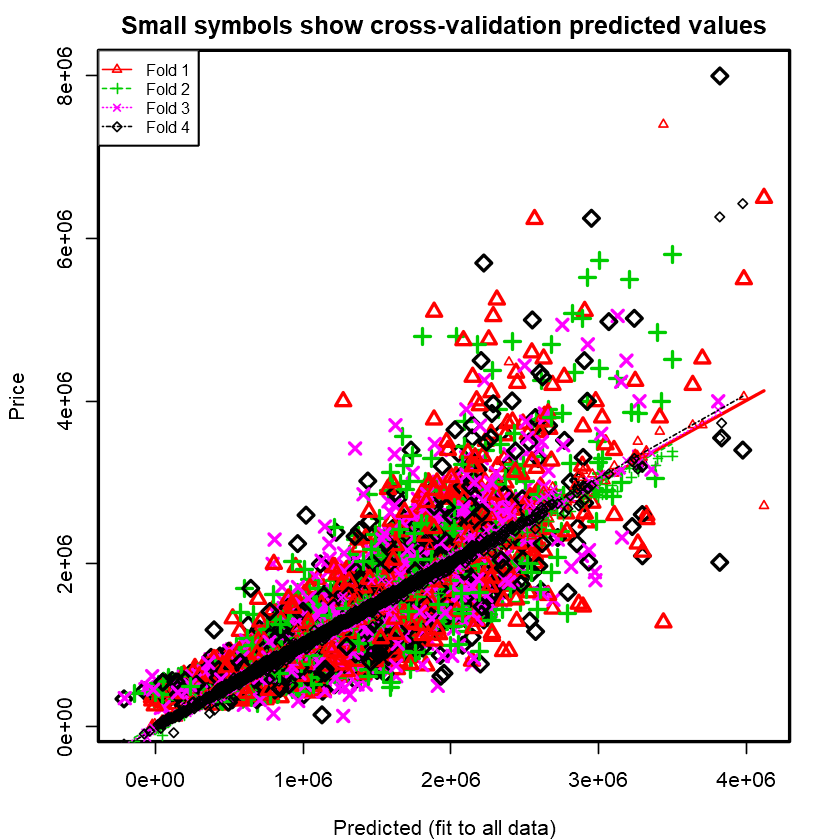

In [25]:
# Cross Vaalidation #
library(DAAG)
re.lm.cv<-cv.lm(data = realestate,form.lm = re.train.lm,m=4)

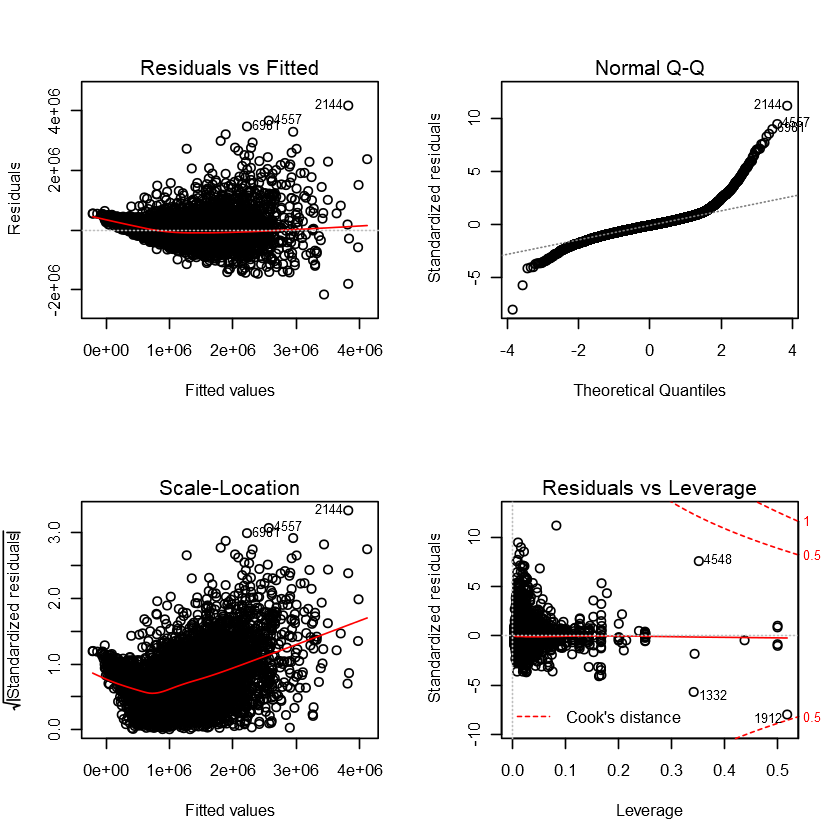

In [26]:
# Diagnostic Plots of realestatelm3 #
par(mfrow=c(2,2))
plot(realestatelm3)


In [44]:
# If we know the type of the house before hand, then:

## For type h ##
re.h.lm<-lm(Price~Landsize+Suburb+Bathroom+Rooms,data = realestate.h) # Taking the first four values based on ranking
summary(re.h.lm)



Call:
lm(formula = Price ~ Landsize + Suburb + Bathroom + Rooms, data = realestate.h)

Residuals:
     Min       1Q   Median       3Q      Max 
-1842476  -200050   -22373   154119  4138322 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               6.55e+05   1.62e+05    4.05  5.3e-05 ***
Landsize                  2.64e+01   4.69e+00    5.64  1.8e-08 ***
SuburbAberfeldie          2.44e+04   1.11e+05    0.22  0.82647    
SuburbAirport West       -6.30e+05   9.30e+04   -6.77  1.4e-11 ***
SuburbAlbert Park         7.62e+05   9.03e+04    8.44  < 2e-16 ***
SuburbAlbion             -5.93e+05   1.10e+05   -5.41  6.6e-08 ***
SuburbAlphington          1.33e+05   1.13e+05    1.17  0.24080    
SuburbAltona             -4.73e+05   9.84e+04   -4.80  1.6e-06 ***
SuburbAltona North       -5.59e+05   9.77e+04   -5.72  1.1e-08 ***
SuburbArmadale            9.38e+05   9.75e+04    9.61  < 2e-16 ***
SuburbAscot Vale         -1.89e+05   7.95e+04   -2.38  0.

In [45]:
## For type t ##
re.t.lm<-lm(Price~Suburb+Bathroom+Rooms,data = realestate.t)
summary(re.t.lm)


Call:
lm(formula = Price ~ Suburb + Bathroom + Rooms, data = realestate.t)

Residuals:
    Min      1Q  Median      3Q     Max 
-723740 -101151   -5898   92301 1434180 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                758087     309405    2.45  0.01458 *  
SuburbAirport West        -280248     173593   -1.61  0.10700    
SuburbAlbion              -437475     260693   -1.68  0.09388 .  
SuburbAlphington           146040     212587    0.69  0.49239    
SuburbAltona              -208238     166407   -1.25  0.21132    
SuburbAltona North        -297138     194335   -1.53  0.12683    
SuburbArmadale             507119     184099    2.75  0.00607 ** 
SuburbAscot Vale           -41791     178477   -0.23  0.81495    
SuburbAshburton            261611     173332    1.51  0.13178    
SuburbAshwood              -53353     184644   -0.29  0.77273    
SuburbAvondale Heights    -222750     177478   -1.26  0.20997    
SuburbBalaclava        

In [46]:
## For type u ##
re.u.lm<-lm(Price~Rooms+Suburb+Bathroom,data = realestate.u)
summary(re.u.lm)



Call:
lm(formula = Price ~ Rooms + Suburb + Bathroom, data = realestate.u)

Residuals:
    Min      1Q  Median      3Q     Max 
-412912  -81155   -4248   64115 1274102 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                337912     188889    1.79  0.07400 .  
Rooms2                     248926      23279   10.69  < 2e-16 ***
Rooms3                     438727      28273   15.52  < 2e-16 ***
Rooms4                     713609      69249   10.30  < 2e-16 ***
Rooms8                    2225665     123581   18.01  < 2e-16 ***
SuburbAirport West         -58537      92686   -0.63  0.52785    
SuburbAlbion              -197726     104888   -1.89  0.05977 .  
SuburbAlphington            81285     119834    0.68  0.49777    
SuburbAltona              -106028      91299   -1.16  0.24585    
SuburbAltona North        -264857     174932   -1.51  0.13040    
SuburbArmadale             406055      98108    4.14  3.9e-05 ***
SuburbAscot Vale       